In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# 1. Load and visualize dataset
df = pd.read_csv(r"C:\Users\User\Downloads\archive (21)\Mall_Customers.csv")
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# Selecting numerical features for clustering
X = df.select_dtypes(include=['float64', 'int64'])

In [5]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

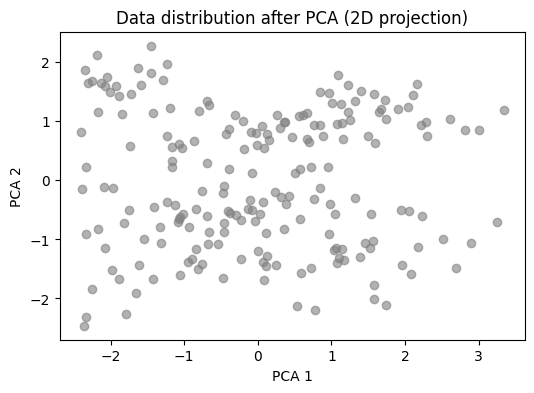

In [6]:
# Optional PCA for visualization (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='gray', alpha=0.6)
plt.title("Data distribution after PCA (2D projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

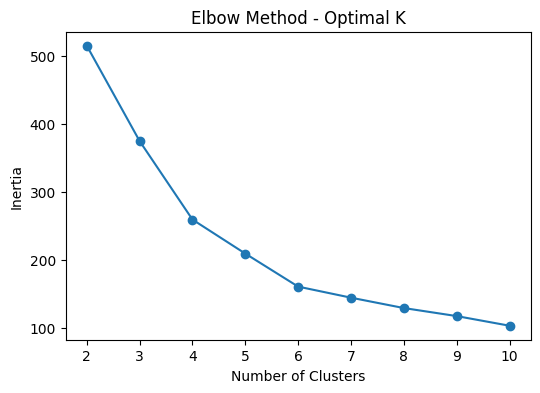

In [7]:
# 3. Elbow Method to find optimal K
inertia = []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method - Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [8]:
# 2. Fit K-Means with chosen K (let's pick K=5 as an example)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataset
df['Cluster'] = cluster_labels

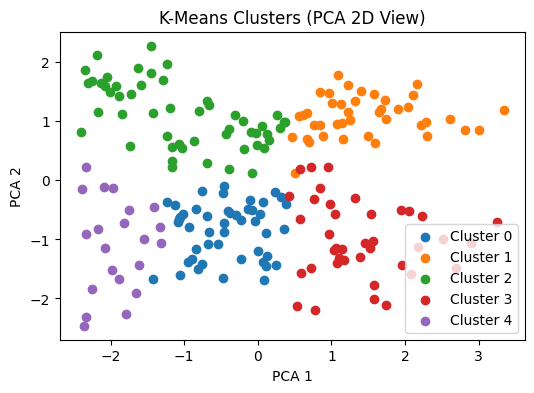

In [9]:
# 4. Visualize clusters with color coding (using PCA 2D)
plt.figure(figsize=(6, 4))
for cluster in range(optimal_k):
    plt.scatter(
        X_pca[cluster_labels == cluster, 0],
        X_pca[cluster_labels == cluster, 1],
        label=f"Cluster {cluster}"
    )
plt.title("K-Means Clusters (PCA 2D View)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

In [10]:
# 5. Evaluate clustering using Silhouette Score
sil_score = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score for K={optimal_k}: {sil_score:.3f}")

# Save clustered dataset (optional)
df.to_csv("mall_customers_clustered.csv", index=False)

Silhouette Score for K=5: 0.427
